In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitter_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.6486,Fri Apr 06 23:47:59 +0000 2018,0.301,0.699,0.000,1
1,0.0000,Fri Apr 06 23:41:21 +0000 2018,0.000,1.000,0.000,2
2,0.0000,Fri Apr 06 23:25:17 +0000 2018,0.000,1.000,0.000,3
3,0.4019,Fri Apr 06 23:23:45 +0000 2018,0.000,0.876,0.124,4
4,-0.3182,Fri Apr 06 23:23:36 +0000 2018,0.173,0.827,0.000,5


In [4]:
sentiments_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,-0.5859,Fri Apr 06 12:00:05 +0000 2018,0.232,0.669,0.099,96
96,-0.6808,Fri Apr 06 11:50:03 +0000 2018,0.270,0.630,0.100,97
97,0.4019,Fri Apr 06 11:44:06 +0000 2018,0.000,0.722,0.278,98
98,-0.3818,Fri Apr 06 11:30:08 +0000 2018,0.191,0.809,0.000,99
99,-0.9136,Fri Apr 06 11:20:08 +0000 2018,0.476,0.524,0.000,100


In [5]:
sentiments_pd['Compound'].mean()

-0.05324999999999999

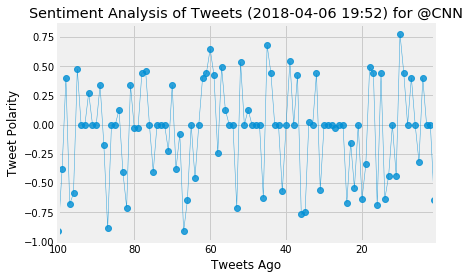

In [6]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

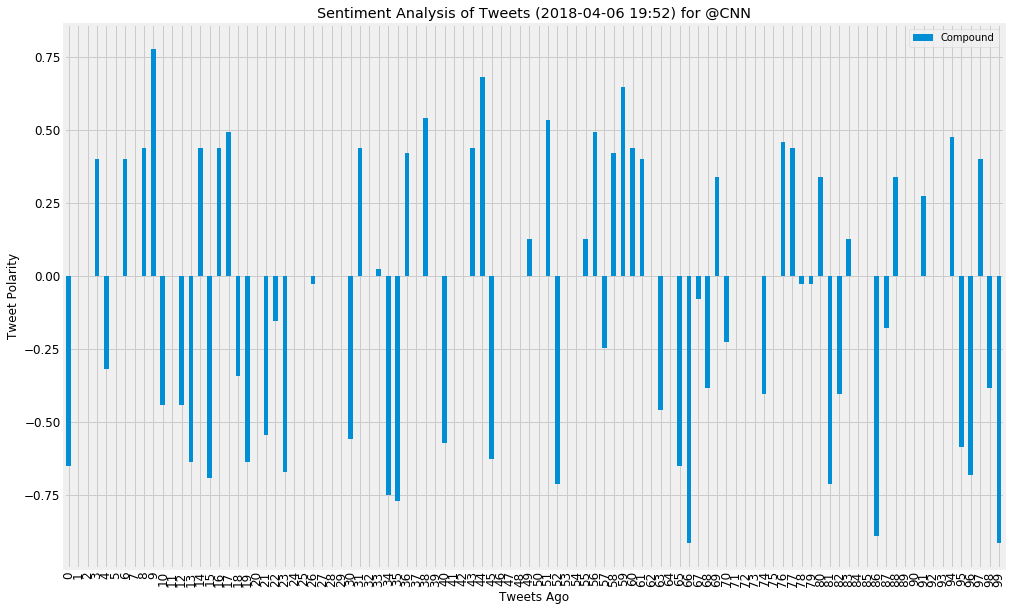

In [7]:
ax = sentiments_pd[['Compound']].plot(kind='bar', title =(f"Sentiment Analysis of Tweets ({now}) for {target_user}"), figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Tweets Ago", fontsize=12)
ax.set_ylabel("Tweet Polarity", fontsize=12)
plt.show()